# explore data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

## might use this to convert column data types prior to csv read

def convert_dtype(x):
    if not x:
        return ''
    try:
        return str(x)   
    except:        
        return ''
    
pd.read_csv('file.csv',converters={'first_column': convert_dtype,'second_column': convert_dtype})

In [2]:
smileon = pd.read_csv('../data/Smileon.2021.10.17.csv', skiprows=2, low_memory = False)
smileon.head(2)

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
0,93115324,SMILE ON 60+ Registration,NaN,9/30/2021 16:56,9/30/2021 16:57,1,3638169,123747,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93115188,SMILE ON 60+ Registration,NaN,9/30/2021 16:53,9/30/2021 16:53,0,4431194,123747,NaN,NaN,...,NaN,NaN,NaN,Referral Follow-Up,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
smileon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57860 entries, 0 to 57859
Columns: 184 entries, CallReportNum to SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
dtypes: float64(103), int64(6), object(75)
memory usage: 81.2+ MB


In [4]:
list(smileon)

['CallReportNum',
 'ReportVersion',
 'LinkedToCallReportNum',
 'CallDateAndTimeStart',
 'CallDateAndTimeEnd',
 'CallLength',
 'CallerNum',
 'PhoneWorkerNum',
 'WasRealCall',
 'WasHangup',
 'WasSexCall',
 'WasWrongNumber',
 'WasPrankCall',
 'WasSilentCall',
 'GeoCode',
 'GeoAssignment',
 'CityName',
 'CountyName',
 'StateProvince',
 'CountryName',
 'PostalCode',
 'CensusDivision',
 'CensusTrack',
 'CensusReportingArea',
 '211Region',
 'PhoneType',
 'ThirdPartyName',
 'ThirdPartyOrganization',
 'ThirdPartyPhoneNumber',
 'ThirdPartyAddress',
 'ThirdPartyCity',
 'ThirdPartyCounty',
 'ThirdPartyStateProvince',
 'ThirdPartyPostalCode',
 'Narrative',
 'VolunteerComments',
 'Feedback',
 'CallersFeedback',
 'TextField2',
 'TextField3',
 'TextField4',
 'TextField5',
 'TextField6',
 'TextField7',
 'TextField8',
 'TextField9',
 'TextField10',
 'EnteredByWorkerNum',
 'EnteredOn',
 'Supervisor',
 'Reviewed',
 'FeedbackStatus',
 'FeedbackFromPhoneWorkerNum',
 'FeedbackFromPhoneWorkerName',
 'Referral

### choosing columns to keep

In [5]:
smileon.columns = [x.replace('"', '') for x in smileon.columns]

In [6]:
smileon = (smileon[['CallReportNum',
                'ReportVersion',
                'CallDateAndTimeStart',
                'CallDateAndTimeEnd',
                'CallerNum',
                'PhoneWorkerNum',
                'CityName',
                'CountyName',
                'PostalCode',
                'SMILE ON 60+ Demographic Information - Gender',
                'Birth Year',
                'SMILE ON 60+ Demographic Information - # of People in Household',
                'SMILE ON 60+ Demographic Information - Household Income Level',
                'SMILE ON 60+ Demographic Information - Race/Ethnicity',
                'SMILE ON 60+ Screening - # of Upper Natural Teeth',
                'SMILE ON 60+ Screening - # of Lower Natural Teeth',
                'SMILE ON 60+ Screening - Do you have removable dentures?',
                'SMILE ON 60+ Screening - Do you usually wear your denture(s) when you eat?',
                'SMILE ON 60+ Screening - How often do you brush your teeth?',
                'SMILE ON 60+ Screening - Need for Periodontal Care',
                'SMILE ON 60+ Screening - Root Fragments',
                'SMILE ON 60+ Screening - Suspicious Soft Tissue Lesions',
                'SMILE ON 60+ Screening - Treatment Urgency',
                'SMILE ON 60+ Screening - Untreated Decay',
                'SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and social six esthetics (top front six teeth are present and disease free)',]])

### clean column names

In [7]:
smileon.columns = [x.replace('SMILE ON 60+', '') for x in smileon.columns]
smileon.columns = [x.replace('DateAndTime', '') for x in smileon.columns]
smileon.columns = [x.replace('Screening -', '') for x in smileon.columns]
smileon.columns = [x.replace('Treatment Plan -', '') for x in smileon.columns]
smileon.columns = [x.replace('Verification of Eligibility -', '') for x in smileon.columns]
smileon.columns = [x.replace('Site Information', '') for x in smileon.columns]
smileon.columns = [x.replace('-', '') for x in smileon.columns]
smileon.columns = [x.replace('Do you have', '') for x in smileon.columns]
smileon.columns = [x.replace('Do you usually wear your', '') for x in smileon.columns]
smileon.columns = [x.replace('Name', '') for x in smileon.columns]

smileon = smileon.rename(columns ={'was the enrollee able to be restored to function (can chew) and social six esthetics (top front six teeth are present and disease free)': 'social six'})

In [8]:
smileon.columns = [x.replace('was the enrollee able to be restored to function (can chew) and ', '') for x in smileon.columns]
smileon.columns = [x.replace(' esthetics (top front six teeth are present and disease free)', '') for x in smileon.columns]

In [9]:
smileon.columns = smileon.columns.str.lower()

In [10]:
smileon.head(2)

,callreportnum,reportversion,callstart,callend,callernum,phoneworkernum,city,county,postalcode,demographic information gender,...,# of lower natural teeth,removable dentures?,denture(s) when you eat?,how often do you brush your teeth?,need for periodontal care,root fragments,suspicious soft tissue lesions,treatment urgency,untreated decay,was the enrollee able to be restored to function (can chew) and social six
0,93115324,SMILE ON 60+ Registration,9/30/2021 16:56,9/30/2021 16:57,3638169,123747,Smyrna,Rutherford,37167.0,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93115188,SMILE ON 60+ Registration,9/30/2021 16:53,9/30/2021 16:53,4431194,123747,Nashville,Davidson,37211.0,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


social_six = smileon.loc[smileon['was the enrollee able to be restored to function (can chew) and social six'] == 'Yes']

In [11]:
smileon.head(3)

,callreportnum,reportversion,callstart,callend,callernum,phoneworkernum,city,county,postalcode,demographic information gender,...,# of lower natural teeth,removable dentures?,denture(s) when you eat?,how often do you brush your teeth?,need for periodontal care,root fragments,suspicious soft tissue lesions,treatment urgency,untreated decay,was the enrollee able to be restored to function (can chew) and social six
0,93115324,SMILE ON 60+ Registration,9/30/2021 16:56,9/30/2021 16:57,3638169,123747,Smyrna,Rutherford,37167.0,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93115188,SMILE ON 60+ Registration,9/30/2021 16:53,9/30/2021 16:53,4431194,123747,Nashville,Davidson,37211.0,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93115081,SMILE ON 60+ Clinical,9/30/2021 16:50,9/30/2021 16:51,2941341,161979,Memphis,Shelby,38104.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [12]:
smileon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57860 entries, 0 to 57859
Data columns (total 25 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   callreportnum                                                                 57860 non-null  int64  
 1   reportversion                                                                 57860 non-null  object 
 2   callstart                                                                     57860 non-null  object 
 3   callend                                                                       57860 non-null  object 
 4   callernum                                                                     57860 non-null  int64  
 5   phoneworkernum                                                                57860 non-null  int64  
 6   city                          

In [13]:
smileon.value_counts('callernum')

callernum
-1          63
 3212379    54
 2441776    43
 2758373    42
 2431132    37
            ..
 2496559     1
 2497323     1
 2497326     1
 2765522     1
 2951150     1
Length: 10711, dtype: int64

In [14]:
smileon.value_counts("postalcode").head(6)

postalcode
37130.0    1681
37013.0    1399
37207.0    1195
37211.0    1053
37115.0    1011
38127.0    1006
dtype: int64

In [15]:
nash = smileon.loc[smileon['city'] == 'Nashville']
nash

,callreportnum,reportversion,callstart,callend,callernum,phoneworkernum,city,county,postalcode,demographic information gender,...,# of lower natural teeth,removable dentures?,denture(s) when you eat?,how often do you brush your teeth?,need for periodontal care,root fragments,suspicious soft tissue lesions,treatment urgency,untreated decay,was the enrollee able to be restored to function (can chew) and social six
1,93115188,SMILE ON 60+ Registration,9/30/2021 16:53,9/30/2021 16:53,4431194,123747,Nashville,Davidson,37211.0,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,93109232,SMILE ON 60+ Registration,9/30/2021 14:45,9/30/2021 14:47,4558147,155548,Nashville,Davidson,NaN,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,93334069,SMILE ON 60+ Clinical,9/30/2021 14:41,9/30/2021 14:41,3756941,134549,Nashville,Davidson,37210.0,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
25,93333840,SMILE ON 60+ Clinical,9/30/2021 14:36,9/30/2021 14:37,2995418,134549,Nashville,Davidson,37203.0,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
29,93331941,SMILE ON 60+ Clinical,9/30/2021 14:02,9/30/2021 14:03,2741897,134549,Nashville,Davidson,37209.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57837,55107951,SMILE ON 60+ Clinical,8/1/2018 10:30,8/1/2018 10:32,2384974,118820,Nashville,Davidson,37211.0,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57839,55107800,SMILE ON 60+ Registration,8/1/2018 10:25,8/1/2018 10:29,2384974,118820,Nashville,Davidson,37211.0,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57842,55107015,SMILE ON 60+ Clinical,8/1/2018 10:00,8/1/2018 10:22,2384744,118820,Nashville,Davidson,37211.0,Female,...,16.0,No,No,twice daily,Yes,NaN,NaN,NaN,No,NaN
57846,55106524,SMILE ON 60+ Clinical,8/1/2018 9:45,8/1/2018 9:54,2384744,118820,Nashville,Davidson,37211.0,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


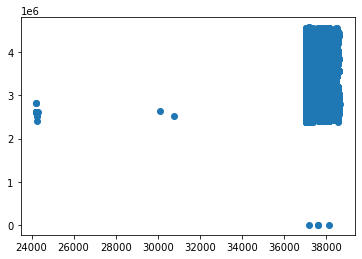

In [16]:
plt.scatter(x='postalcode', y= 'callernum', data=smileon)

for i in range(len(vallist)):
    if vallist[i] >= 10:
    vallist[i] = letters[i]

i = 'SMILE ON 60+'
smileon_clean = []
for i in range(len(smileon)):
    if column = i
    re.sub(i, "", smileon)